<a href="https://colab.research.google.com/github/PIRomanCod/DataSciense_HW/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import random
from sklearn.linear_model import LinearRegression as LR

## Hапишіть функцію гіпотези лінійної регресії у векторному вигляді

Лінійна функція представляється у вигляді наступного рівняння: $$y=kx+b$$
де x - ознака (feature), y - цільове значення, k - коєфіцієнт нахилу прямої, а b - точка на осі y, через яку проходить графік функції при x = 0.
k та b взагалі - це ваги для ознак.
У DataScience ознак для кожного цільового значення може бути декілька, тому для кожного feature приймаються ваги:
$$h(\vec{x}) = w_0 + w_1 * x_1 + w_2 * x_2 + ...+ w_n *x_n$$

Ціль навчання моделі - знайти такі коефіцієнти (ваги)
$$w_0, w_1, w_n$$, щоб значення  $$h(x_{(i)})$$ були якомога ближчі до значення $$y_{(i)}$$

Лінійна регрессія у векторному вигляді описується наступною формулою
 $$h(\vec{x}) = \vec{w} * \vec{x}$$

Функція гіпотези лінійної регресії за допомогою numpy виглядає наступним чином:

In [28]:
def model(X, w):
    return np.dot(X, w)

X = np.array([[1, 0, 3], [1, 1, 2], [1, 2, 4]])  # Приклад матриці вхідних ознак
w = np.array([0, 1, 3])  # Приклад вагів ознак моделі

h = model(X, w)
h

array([ 9,  7, 14])

## Створіть функцію для обчислення функції втрат у векторному вигляді

Функція втрат/помилок (loss/error/cost function) - це функція, яка вимірює рівень помилок алгоритму машинного навчання, який навчається на тренувальних даних. Завдяки їй оцінюється наскільки сильно модель помиляється

Функція втрат у математичному вигляді представлена наступною формулою:
$$J(\vec{w}) = (1/2*n)\sum_{i=1}^n(h(x^i)- y^i)^2$$
де:
n – кількість спостережень,
X - матриця вхідних змінних,
w - вектор параметрів моделі (ваги),
y - вектор фактичних значень


Функція втрат за допомогою numpy виглядає наступним чином:

In [29]:
def cost0(X, w, y):
  n = X.shape[0]
  return np.square(model(X, w) - y).sum() / (2 * n)

y = np.array([1, 3, 5])
cost0(X, w, y)

26.833333333333332

## Реалізуйте один крок градієнтного спуску;




Градієнтний спуск (Gradient Descent) - це алгоритм оптимізації, який використовується для знаходження мінімуму функції шляхом ітеративного зменшення значення функції в напрямку найшвидшого спаду її значення.

Градієнтний спуск використовується для оптимізації параметрів $$(w_0, w_1, ...)$$ моделі шляхом мінімізації функції втрат (cost function). Ідея полягає у тому, щоб визначити напрямок найшвидшого зменшення функції втрат і змінювати параметри моделі в цьому напрямку. Цей процес повторюється доти, поки значення функції втрат не стане достатньо малим або досягне заданого ліміту ітерацій

У математичному вигляді градіентний спуск записується наступною формулою:
$$h(\vec{w}) = \vec{w}^{prev} - \alpha∇J(\vec{w})$$

 Один крок градієнтного спуску за допомогою numpy виглядає наступним чином:

In [30]:
def gradient_descent_step(X, y, w, learning_rate):
    n = X.shape[0]

    # Обчислення передбачень
    predictions = model(X, w)
    # Обчислення помилок
    error = predictions - y
    # Обчислення градієнта функції втрат
    gradient = (1/n) * np.dot(X.T, error)
    # Оновлення вектора ваг
    w = w - learning_rate * gradient

    return w

learning_rate = 0.05  # Швидкість навчання (learning rate)

# Один крок градієнтного спуску
w_updated = gradient_descent_step(X, y, w, learning_rate)

print("Нові параметри:")
print(w_updated)

Нові параметри:
[-0.35        0.63333333  1.86666667]


Функція отримання оптимальних показників вагів

In [31]:
def gradient_descent(X, y, w, learning_rate, num_iterations):
    losses = cost0(X, w, y)
    losses_history = [losses]
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        losses = cost0(X, w, y)
        losses_history.append(losses)
    return w, losses_history

# Викликаємо функцію w_optimal з наступними параметрами X, y, w, learning_rate, и num_iterations
w_optimal, losses_history = gradient_descent(X, y, w, learning_rate, 100)

print("Найоптимальніші ваги, втрати:")
print(w_optimal, losses_history[-1])

Найоптимальніші ваги, втрати:
[-0.3720568   1.73632854  0.52170247] 0.07053967066703623


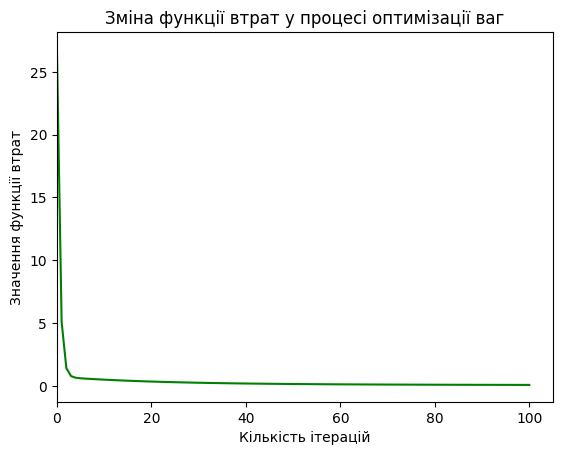

In [32]:
sns.lineplot(x=np.arange(len(losses_history)), y=[k for k in losses_history], color='green')
plt.title('Зміна функції втрат у процесі оптимізації ваг')
plt.xlabel('Кількість ітерацій')
plt.xlim(0)
plt.ylabel('Значення функції втрат')
plt.show()

## Знайдіть найкращі параметри $$\vec{w}$$
  ## для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [33]:
df = pd.read_csv("/content/Housing.csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [34]:
scaler = MinMaxScaler()

columns_to_normalize = ['area', 'bedrooms', 'bathrooms', 'price']
normalized_data = scaler.fit_transform(df[columns_to_normalize])
norm_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

norm_df.head(3)

,area,bedrooms,bathrooms,price
0,0.396564,0.6,0.333333,1.000000
1,0.502405,0.6,1.000000,0.909091
2,0.571134,0.4,0.333333,0.909091


In [35]:
X = np.array(norm_df[['area', 'bedrooms', 'bathrooms']])
y = np.array(norm_df['price'])
X.shape, y.shape

((545, 3), (545,))

## Реалізація лінійної регресії за допомогою класу LinearRegression

In [36]:
def cost(y: np.array, h: np.array, w: np.array) -> float:
     return np.mean((h - y) ** 2) / 2

class LinearRegression:
    def __init__(self, lr: float = 0.001, thr: float = 0.00001, n_epochs: int = 100, w = [random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5)]):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = w
        #print(f"Init w: {self.w}")

    def predict(self, X: list) -> list:
        predict = []
        for xi in X:
            predict.append(self.w[0] * xi[0] + self.w[1] * xi[1])

        return predict

    def update_w(self, X: list, y: list):
        # wk = wk - lr / m * sum((h(xi) - yi) * xik)
        m = len(y)

        h = self.predict(X)

        sm0 = 0
        sm1 = 0
        sm2 = 0
        for xi, hi, yi in zip(X, h, y):
            sm0 += (hi - yi) * xi[0]
            sm1 += (hi - yi) * xi[1]
            sm2 += (hi - yi) * xi[2]

        self.w[0] = self.w[0] - self.lr * sm0 / m
        self.w[1] = self.w[1] - self.lr * sm1 / m
        self.w[2] = self.w[2] - self.lr * sm2 / m

    def fit(self, X: list, y: list):
        last_cost = 1000000

        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X), self.w)
            #print(f"{i}, {self.w}, {new_cost}")
            if last_cost - new_cost < self.thr:
                break
            last_cost = new_cost
        return f"Найкращі параметри w: {self.w}, втрати:{new_cost}, знайдено за {i} ітерацій"

In [37]:
linear_regression = LinearRegression(lr=0.05, n_epochs=1000, thr=0.00001)
res_1 = linear_regression.fit(X, y)
res_1

'Найкращі параметри w: [1.1676753765393335, -0.0586589583724664, 2.01510504189109], втрати:0.01346444524434383, знайдено за 807 ітерацій'

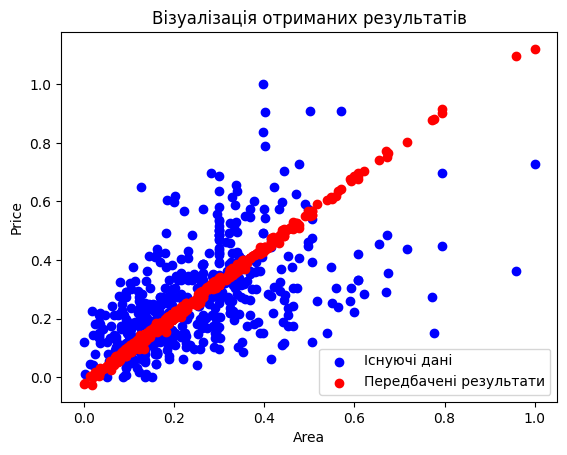

In [38]:
plt.scatter(X[:, 0], y, color='b', label='Існуючі дані')
plt.scatter(X[:, 0], linear_regression.predict(X), color='r', label='Передбачені результати')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Візуалізація отриманих результатів')
plt.legend()
plt.show()

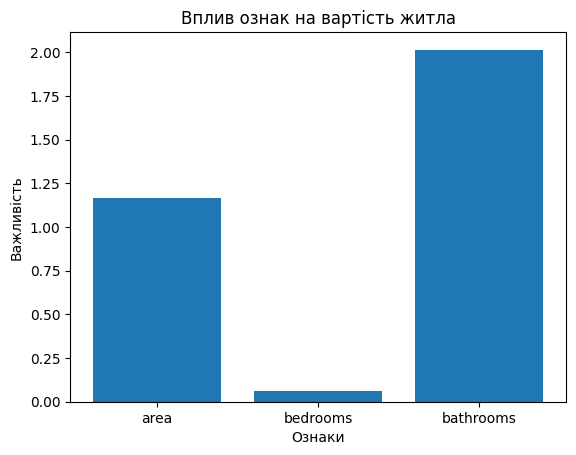

In [39]:
feature_names = ['area', 'bedrooms', 'bathrooms']
importance = np.abs(linear_regression.w)
plt.bar(feature_names, importance)
plt.xlabel('Ознаки')
plt.ylabel('Важливість')
plt.title('Вплив ознак на вартість житла')
plt.show()

## Знайдіть ці ж параметри за допомогою аналітичного рішення

Математичний вигляд Normal equation (аналітичного рішення) наступне: $$(\vec{w})^* = (X^TX)^{-1}X^T\vec{y}$$

 аналітичне рішення за допомогою numpy виглядає наступним чином:

In [40]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(theta.shape)
print(X.shape)
print(y.shape)
analytical = cost(X, y.reshape(-1, 1), theta)
res_2 = f"Найкращі параметри w: {theta.flatten()}, втрати: {analytical}"
print(res_2)

(3,)
(545, 3)
(545,)
Найкращі параметри w: [0.51550397 0.25511989 0.34191443], втрати: 0.02073607533747462


## Рішення за допомогою бібліотеки  sklearn

In [41]:
regressor = LR().fit(X, y)
res_3 = f"Найкращі параметри w: {regressor.coef_}, втрати: {regressor.intercept_}"
res_3

'Найкращі параметри w: [0.47714269 0.17611257 0.36001286], втрати: 0.04282739976995403'

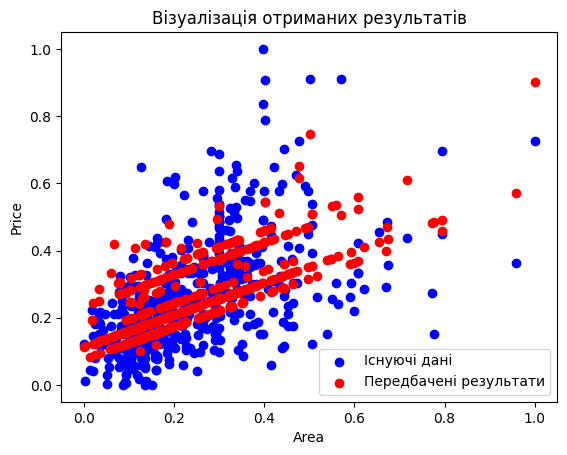

In [42]:
plt.scatter(X[:, 0], y, color='b', label='Існуючі дані')
plt.scatter(X[:, 0], regressor.predict(X), color='r', label='Передбачені результати')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Візуалізація отриманих результатів')
plt.legend()
plt.show()

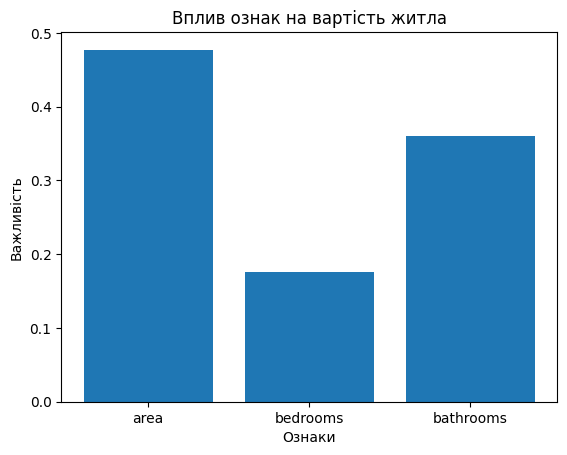

In [43]:
feature_names = ['area', 'bedrooms', 'bathrooms']
importance = np.abs(regressor.coef_)
plt.bar(feature_names, importance)
plt.xlabel('Ознаки')
plt.ylabel('Важливість')
plt.title('Вплив ознак на вартість житла')
plt.show()

## Рішення на окремо написаних функціях в рамках ДЗ


In [44]:
#w = np.array([0, 1, 3])  # Приклад вагів ознак моделі
h = model(X, w)
loss= cost0(X, w, y)
learning_rate = 0.5
w_optimal, losses_history = gradient_descent(X, y, w, learning_rate, 100)
res_4 = f'Найкращі параметри w: {w_optimal}, втрати: {losses_history[-1]}, ітерацій: {len(losses_history)-1}'
res_4


'Найкращі параметри w: [0.18664926 0.24018036 1.07488814], втрати: 0.01439362186333457, ітерацій: 100'

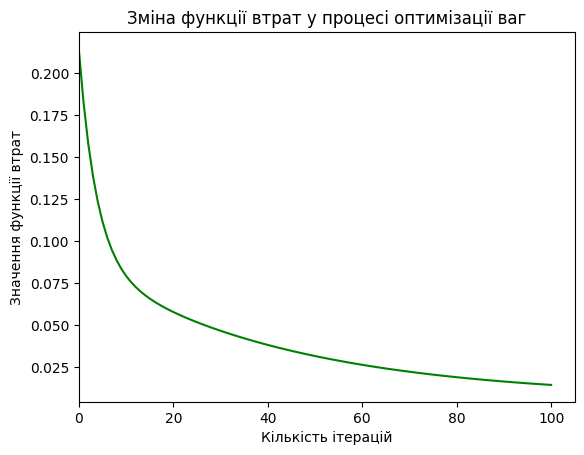

In [45]:
sns.lineplot(x=np.arange(len(losses_history)), y=[k for k in losses_history], color='green')
plt.title('Зміна функції втрат у процесі оптимізації ваг')
plt.xlabel('Кількість ітерацій')
plt.xlim(0)
plt.ylabel('Значення функції втрат')
plt.show()

(545, 3)
(545,)
(545, 1)
0.0 0.1415953265007708
0.1111111111111111 0.11828503748894652
0.2222222222222222 0.09859712349429085
0.3333333333333333 0.08253158451680388
0.4444444444444444 0.07008842055648555
0.5555555555555556 0.0612676316133359
0.6666666666666666 0.0560692176873549
0.7777777777777777 0.05449317877854257
0.8888888888888888 0.05653951488689888
1.0 0.06220822601242386


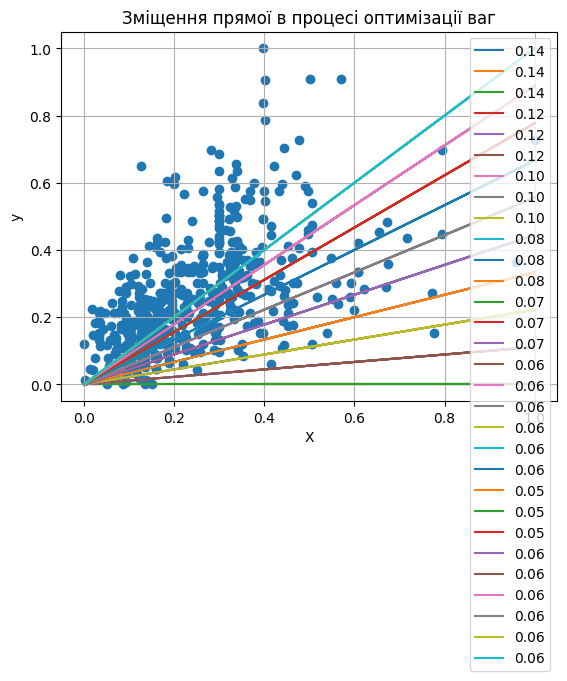

In [46]:
print(X.shape)
print(y.shape)
y_reshaped = y.reshape(-1, 1)
print(y_reshaped.shape)
plt.scatter(X[:, 0], y)
res = []
for w1 in np.linspace(0, 1, 10):
    tmp = cost0(X, w1, y_reshaped)
    print(w1, tmp)
    res.append(tmp)
    plt.plot(X, model(np.array(X), w1), label=f'{tmp:.2f}')

plt.legend()
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Зміщення прямої в процесі оптимізації ваг')
plt.show()

##Порівняння всіх представлених рішень:

In [47]:
print("Порівняння результатів розрахунків: ")
print(f"\nСамописний класс за вподобою sklearn: {res_1}")
print(f"Аналітичне рішення: {res_2}")
print(f"Бібілотека sklearn: {res_3}")
print(f"Рішення на функціях: {res_4}")

Порівняння результатів розрахунків: 

Самописний класс за вподобою sklearn: Найкращі параметри w: [1.1676753765393335, -0.0586589583724664, 2.01510504189109], втрати:0.01346444524434383, знайдено за 807 ітерацій
Аналітичне рішення: Найкращі параметри w: [0.51550397 0.25511989 0.34191443], втрати: 0.02073607533747462
Бібілотека sklearn: Найкращі параметри w: [0.47714269 0.17611257 0.36001286], втрати: 0.04282739976995403
Рішення на функціях: Найкращі параметри w: [0.18664926 0.24018036 1.07488814], втрати: 0.01439362186333457, ітерацій: 100
